In [1]:
%matplotlib inline
import statistics
import random
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# paremeters for the random number generator
mean = 0
stdev = 0.5

# other parameters
Cpk = 1.67
USL = 3
LSL = -3

In [22]:
# generate n samples
meanOfSamples = []
stdevOfSamples = []

allData = []

for sampleNo in range(100):
    data = []
    for i in range(10):
        data.append(random.gauss(mean, stdev))
    m = statistics.mean(data)
    s = statistics.stdev(data)
    c = min((USL-m)/(3*s), (m-LSL)/(3*s))
#     print(c)
    meanOfSamples.append(m)
    stdevOfSamples.append(s)
    allData.extend(data)

In [23]:
# 𝑠𝑡𝑑𝑒𝑣 = −1/(3 𝐶_𝑝𝑢) 𝑚𝑒𝑎𝑛 + 𝑈𝑆𝐿/(3 𝐶_𝑝𝑢)
# isoline coordinates
l1 = [(0, 𝑈𝑆𝐿/(3*𝐶pk)), (USL, 0)]
l2 = [(0, 𝑈𝑆𝐿/(3*𝐶pk)), (LSL, 0)]

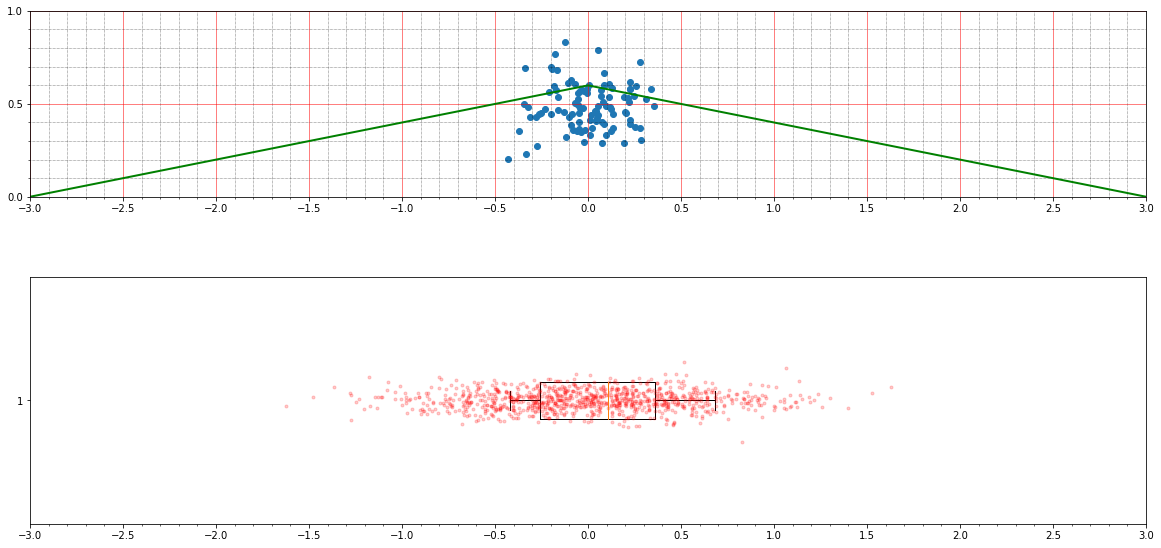

In [24]:
plt.rcParams['figure.figsize'] = (20,10)
fig = plt.figure()
ax=fig.add_subplot(211)

ax.set_xlim(left=LSL, right=USL)
ax.set_ylim(bottom=0)
ax.set_aspect('equal')

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

# ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ax.scatter(meanOfSamples, stdevOfSamples)

from matplotlib.collections import LineCollection
lc = LineCollection([l1, l2], color=["green","green"], lw=2)
ax.add_collection(lc)

ax2 = fig.add_subplot(2, 1, 2, sharex = ax)

ax2.boxplot(data, vert=False)

y = allData
x = np.random.normal(1, 0.04, size=len(y))
ax2.plot(y, x, 'r.', alpha=0.2)